In [ ]:
# Description : This is a sentiment analysis program that pulls tweets from twitter using python(Tweepy Library)

In [ ]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Twitter Api Credentials
consumerKey = "Ud0KvOSOGP8wbRZbIfakU9guq"
consumerSecret = "3nOoCP1luHnN1HCnaJiRLdQ0N0yLzvHuhxayuWVCLM7CW1cHEm"
accessToken = "2249769735-bTPbjMOdZDTjDpcnh2neEtLRKFQJpkVD2ZAgGc5"
accessTokenSecret = "Fr6SaN8OJ9IrgJfZ0mBa1BTHa3Nc4Pcrnky1tO2fFGxVK"

In [ ]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="elonmusk", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) Do you want Tesla to accept Doge?

2) @tculpan Exactly

3) SNL Monologue
https://t.co/b2cvFGqVFF

4) Thanks again to @nbcsnl cast, writers &amp; crew! Honor &amp; pleasure to do the show with you.

5) @MileyCyrus @Grimezsz 🤣🤣



In [ ]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

# Show the first 5 rows of data
df.head()

,Tweets
0,Do you want Tesla to accept Doge?
1,@tculpan Exactly
2,SNL Monologue\nhttps://t.co/b2cvFGqVFF
3,"Thanks again to @nbcsnl cast, writers &amp; cr..."
4,@MileyCyrus @Grimezsz 🤣🤣


In [ ]:
#Clean the text

# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text

 # Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Do you want Tesla to accept Doge?
1,Exactly
2,SNL Monologue\n
3,"Thanks again to cast, writers &amp; crew! Hon..."
4,🤣🤣
...,...
95,🔥
96,The Dogefather\nSNL May 8
97,"Did my heart love till now? forswear it, sigh..."
98,"Romeo + Juliet, fish tank scene"


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Do you want Tesla to accept Doge?,0.000,0.0000
1,Exactly,0.250,0.2500
2,SNL Monologue\n,0.000,0.0000
3,"Thanks again to cast, writers &amp; crew! Hon...",0.200,0.2500
4,🤣🤣,0.000,0.0000
...,...,...,...
95,🔥,0.000,0.0000
96,The Dogefather\nSNL May 8,0.000,0.0000
97,"Did my heart love till now? forswear it, sigh...",0.625,0.4875
98,"Romeo + Juliet, fish tank scene",0.000,0.0000


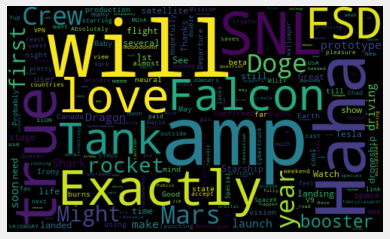

In [ ]:
# Plot Word Clouds
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Do you want Tesla to accept Doge?,0.000,0.0000,Neutral
1,Exactly,0.250,0.2500,Positive
2,SNL Monologue\n,0.000,0.0000,Neutral
3,"Thanks again to cast, writers &amp; crew! Hon...",0.200,0.2500,Positive
4,🤣🤣,0.000,0.0000,Neutral
...,...,...,...,...
95,🔥,0.000,0.0000,Neutral
96,The Dogefather\nSNL May 8,0.000,0.0000,Neutral
97,"Did my heart love till now? forswear it, sigh...",0.625,0.4875,Positive
98,"Romeo + Juliet, fish tank scene",0.000,0.0000,Neutral


In [ ]:
# Print all of positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i]) #Sorted the tweets to get the most positive one first
    print()
    j= j+1

Printing positive tweets:

1)  Exactly

2) Thanks again to  cast, writers &amp; crew! Honor &amp; pleasure to do the show with you.

3)  Haha

4)   Absolutely

5) 3Owners I love Dieter

6) Wario was my fav haha 👀 


7) Special link to view SNL outside USA


8) First time a Falcon rocket booster will reach double digits in flights 

9)       It pretty much looks like this

10)      Great pic

11) Cybertruck prototype in New York this weekend

12) Cryptocurrency is promising, but please invest with caution! 

13)  Nice shot

14)  for sure!

15)  Haha true

16)  Exactly

17)  Haha awesome! See you soon.

18) 8  Thanks Jim

19) _road True

20)  Which means ~1/10th of you is 13.8 billion years old

21)  Only limitation is high density of users in urban areas. Most likely, all of the initial 500k will receive service. More of a challenge when we get into the several million user range.

22) : Falcon 9’s first stage has landed on the Of Course I Still Love You droneship – the 9th landing of t

In [ ]:
# Print all the negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i]) #Most negative tweets come first
    print()
    j=j+1

Printing negative tweets:

1)   Mars Base Alpha

2)  420  Rawlinson was never chief engineer. He arrived after Model S prototype was made, left before things got tough &amp; was only ever responsible for body engineering, not powertrain, battery, software, production or design.

3)     Probably a few months. There are many subtle differences between US &amp; Canada driving.

4)  Sorry 🤣🤣 




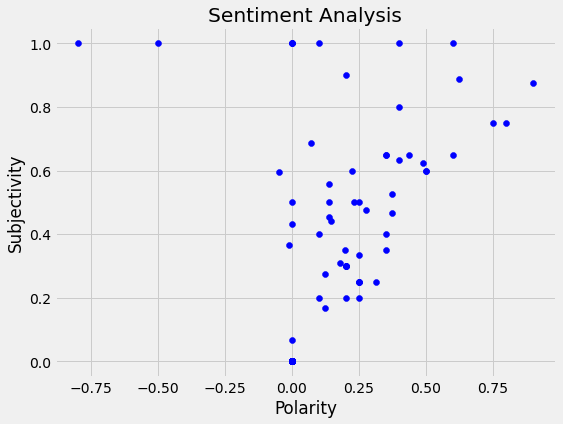

In [ ]:
# Plot the polarity and subjetivity
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
  
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [ ]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)


47.0

In [ ]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

4.0

In [ ]:
# Show the value counts of Positive, Neutral and Negative
df['Analysis'].value_counts()

Neutral     49
Positive    47
Negative     4
Name: Analysis, dtype: int64

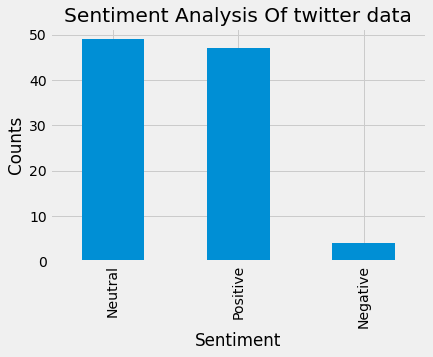

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis Of twitter data')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()